<a href="https://colab.research.google.com/github/XGHouFTW/py-cryptopredict/blob/main/LSTMPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install ipdb
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Mount Google Drive

from google.colab import drive

# For use in a terminal interface

import sys

In [ ]:
# Load our dataset 
# Note it should be in same dir

filepath = '/content/MyDrive/MyDrive/ISEF/Datasets/MergedPriceData.csv'
drive.mount('/content/MyDrive')
maindf=pd.read_csv(filepath)

# script, filepath, currencies = sys.argv
# currencies = currencies.split()


Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [ ]:
display(maindf)

,Date,BTC-Open,BTC-High,BTC-Low,BTC-Close,BTC-Adj Close,BTC-Volume,ETH-Open,ETH-High,ETH-Low,...,reddit-pandemicComScoresum,reddit-pandemicComScoreaverage,reddit-pandemicScorecount,reddit-politicsPosScoresum,reddit-politicsPosScoreaverage,reddit-politicsNegScoresum,reddit-politicsNegScoreaverage,reddit-politicsComScoresum,reddit-politicsComScoreaverage,reddit-politicsScorecount
0,2020-01-31 00:00:00,9508.313477,9521.706055,9230.776367,9350.529297,9350.529297,29432489719,184.736908,185.405838,176.296814,...,3.2440,0.811000,4,105.292,0.127011,90.150,0.108745,80.5780,0.097199,829
1,2020-02-01 00:00:00,9346.357422,9439.323242,9313.239258,9392.875000,9392.875000,25922656496,180.113770,183.845551,179.745178,...,0.0000,NaN,0,90.497,0.128001,84.876,0.120051,32.1929,0.045535,707
2,2020-02-02 00:00:00,9389.820313,9468.797852,9217.824219,9344.365234,9344.365234,30835736946,183.532501,193.080399,180.173950,...,0.9538,0.953800,1,86.129,0.126474,79.325,0.116483,57.2687,0.084095,681
3,2020-02-03 00:00:00,9344.683594,9540.372070,9248.633789,9293.521484,9293.521484,30934096509,188.607407,193.436890,188.012695,...,1.3616,0.680800,2,96.977,0.131583,82.521,0.111969,62.4516,0.084738,737
4,2020-02-04 00:00:00,9292.841797,9331.265625,9112.811523,9180.962891,9180.962891,29893183716,189.861725,191.111496,185.403625,...,-1.9347,-0.644900,3,113.346,0.138565,87.845,0.107390,86.9004,0.106235,818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2022-01-27 00:00:00,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629,2467.188477,2510.451660,2328.452148,...,2.2531,0.450620,5,61.515,0.115847,66.700,0.125612,-8.2675,-0.015570,531
728,2022-01-28 00:00:00,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523,2421.646973,2548.778564,2367.833740,...,-8.3716,-0.380527,22,65.160,0.118043,58.695,0.106332,37.5748,0.068070,552
729,2022-01-29 00:00:00,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075,2546.590576,2627.609375,2526.989746,...,0.8587,0.858700,1,61.324,0.118158,64.365,0.124017,-28.6265,-0.055157,519
730,2022-01-30 00:00:00,38151.917969,38266.339844,37437.710938,37917.601563,37917.601563,14643548444,2598.564941,2631.408447,2550.460938,...,0.0000,NaN,0,55.537,0.126508,58.756,0.133841,-29.8882,-0.068082,439


In [ ]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  732
Total number of fields present in the dataset:  173


In [ ]:
maindf.shape

(732, 173)

In [ ]:
maindf.head()

,Date,BTC-Open,BTC-High,BTC-Low,BTC-Close,BTC-Adj Close,BTC-Volume,ETH-Open,ETH-High,ETH-Low,...,reddit-pandemicComScoresum,reddit-pandemicComScoreaverage,reddit-pandemicScorecount,reddit-politicsPosScoresum,reddit-politicsPosScoreaverage,reddit-politicsNegScoresum,reddit-politicsNegScoreaverage,reddit-politicsComScoresum,reddit-politicsComScoreaverage,reddit-politicsScorecount
0,2020-01-31 00:00:00,9508.313477,9521.706055,9230.776367,9350.529297,9350.529297,29432489719,184.736908,185.405838,176.296814,...,3.2440,0.8110,4,105.292,0.127011,90.150,0.108745,80.5780,0.097199,829
1,2020-02-01 00:00:00,9346.357422,9439.323242,9313.239258,9392.875000,9392.875000,25922656496,180.113770,183.845551,179.745178,...,0.0000,NaN,0,90.497,0.128001,84.876,0.120051,32.1929,0.045535,707
2,2020-02-02 00:00:00,9389.820313,9468.797852,9217.824219,9344.365234,9344.365234,30835736946,183.532501,193.080399,180.173950,...,0.9538,0.9538,1,86.129,0.126474,79.325,0.116483,57.2687,0.084095,681
3,2020-02-03 00:00:00,9344.683594,9540.372070,9248.633789,9293.521484,9293.521484,30934096509,188.607407,193.436890,188.012695,...,1.3616,0.6808,2,96.977,0.131583,82.521,0.111969,62.4516,0.084738,737
4,2020-02-04 00:00:00,9292.841797,9331.265625,9112.811523,9180.962891,9180.962891,29893183716,189.861725,191.111496,185.403625,...,-1.9347,-0.6449,3,113.346,0.138565,87.845,0.107390,86.9004,0.106235,818


In [ ]:
maindf.tail()

,Date,BTC-Open,BTC-High,BTC-Low,BTC-Close,BTC-Adj Close,BTC-Volume,ETH-Open,ETH-High,ETH-Low,...,reddit-pandemicComScoresum,reddit-pandemicComScoreaverage,reddit-pandemicScorecount,reddit-politicsPosScoresum,reddit-politicsPosScoreaverage,reddit-politicsNegScoresum,reddit-politicsNegScoreaverage,reddit-politicsComScoresum,reddit-politicsComScoreaverage,reddit-politicsScorecount
727,2022-01-27 00:00:00,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629,2467.188477,2510.451660,2328.452148,...,2.2531,0.450620,5,61.515,0.115847,66.700,0.125612,-8.2675,-0.015570,531
728,2022-01-28 00:00:00,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523,2421.646973,2548.778564,2367.833740,...,-8.3716,-0.380527,22,65.160,0.118043,58.695,0.106332,37.5748,0.068070,552
729,2022-01-29 00:00:00,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075,2546.590576,2627.609375,2526.989746,...,0.8587,0.858700,1,61.324,0.118158,64.365,0.124017,-28.6265,-0.055157,519
730,2022-01-30 00:00:00,38151.917969,38266.339844,37437.710938,37917.601563,37917.601563,14643548444,2598.564941,2631.408447,2550.460938,...,0.0000,NaN,0,55.537,0.126508,58.756,0.133841,-29.8882,-0.068082,439
731,2022-01-31 00:00:00,37920.281250,38647.261719,36733.574219,38483.125000,38483.125000,20734730465,2603.263428,2697.735352,2489.072266,...,-0.4536,-0.151200,3,57.972,0.113894,75.494,0.148318,-75.8634,-0.149044,509


In [ ]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Columns: 173 entries, Date to reddit-politicsScorecount
dtypes: float64(146), int64(26), object(1)
memory usage: 989.5+ KB


In [ ]:
maindf.describe()

,BTC-Open,BTC-High,BTC-Low,BTC-Close,BTC-Adj Close,BTC-Volume,ETH-Open,ETH-High,ETH-Low,ETH-Close,...,reddit-pandemicComScoresum,reddit-pandemicComScoreaverage,reddit-pandemicScorecount,reddit-politicsPosScoresum,reddit-politicsPosScoreaverage,reddit-politicsNegScoresum,reddit-politicsNegScoreaverage,reddit-politicsComScoresum,reddit-politicsComScoreaverage,reddit-politicsScorecount
count,732.000000,732.000000,732.000000,732.000000,732.000000,7.320000e+02,732.000000,732.000000,732.000000,732.000000,...,732.000000,271.000000,732.000000,732.000000,709.000000,732.000000,709.000000,732.000000,709.000000,732.000000
mean,30577.305309,31401.066937,29652.322138,30610.525694,30610.525694,4.016244e+10,1659.174057,1716.813729,1593.657182,1662.115175,...,-0.035281,-0.005517,1.020492,73.511120,0.122016,72.597403,0.121720,-8.221996,-0.018684,598.762295
std,19344.986007,19854.526792,18731.907756,19324.550079,19324.550079,2.064352e+10,1440.348838,1485.135572,1386.749291,1438.945261,...,1.147100,0.565882,2.102924,20.614223,0.007690,17.781283,0.008809,42.894499,0.067573,148.842881
min,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,1.225260e+10,110.406784,116.021622,95.184303,110.605873,...,-11.599900,-0.982200,0.000000,0.000000,0.095027,0.000000,0.100175,-171.913300,-0.278247,0.000000
25%,10305.641845,10492.340820,10137.011231,10320.845947,10320.845947,2.747029e+10,331.432732,344.116249,318.102417,335.091713,...,0.000000,-0.502342,0.000000,63.158750,0.116574,64.787250,0.115945,-33.611125,-0.060833,536.000000
50%,33463.027344,34537.546875,32055.104492,33496.576172,33496.576172,3.620891e+10,1379.527771,1430.640625,1296.356140,1382.398438,...,0.000000,0.000000,0.000000,73.629500,0.121750,74.505000,0.121024,-9.069950,-0.018596,611.000000
75%,47780.924804,49161.133789,46678.666993,47729.456054,47729.456054,4.756835e+10,2889.491211,2986.955201,2742.226257,2889.259460,...,0.000000,0.452450,1.000000,85.916750,0.126642,82.940500,0.126495,15.119250,0.024541,690.250000
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11,4810.071289,4891.704590,4718.039063,4812.087402,...,5.986200,0.997700,22.000000,126.036000,0.154645,111.428000,0.157212,153.189000,0.209275,844.000000


In [ ]:
maindf.columns

Index(['Date', 'BTC-Open', 'BTC-High', 'BTC-Low', 'BTC-Close', 'BTC-Adj Close',
       'BTC-Volume', 'ETH-Open', 'ETH-High', 'ETH-Low',
       ...
       'reddit-pandemicComScoresum', 'reddit-pandemicComScoreaverage',
       'reddit-pandemicScorecount', 'reddit-politicsPosScoresum',
       'reddit-politicsPosScoreaverage', 'reddit-politicsNegScoresum',
       'reddit-politicsNegScoreaverage', 'reddit-politicsComScoresum',
       'reddit-politicsComScoreaverage', 'reddit-politicsScorecount'],
      dtype='object', length=173)

In [ ]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 2493


In [ ]:
print('NA values:',maindf.isnull().values.any())

NA values: True


In [ ]:
# Replace all null values with 0
maindf.replace(to_replace = np.nan, value = 0.0, inplace = True)

In [ ]:
# Final shape of the dataset after dealing with null values
maindf.shape

(732, 173)

In [ ]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0]["Date"]
ed=maindf.iloc[-1]["Date"]

print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2020-01-31 00:00:00
Ending Date 2022-01-31 00:00:00


In [ ]:
# Normalize the cleaned dataset before train/test splitting

def normalize_column(column: pd.Series)-> pd.Series:
  STD = np.std(column)
  mean = np.mean(column)
  column = column.apply(lambda x: (x-mean)/STD)
  return column

def normalize_dataset(data: pd.DataFrame):
  columns = list(data.columns)
  for column in columns[1:]:
    data[column] = normalize_column(data[column])

normalize_dataset(maindf)
display(maindf)

,Date,BTC-Open,BTC-High,BTC-Low,BTC-Close,BTC-Adj Close,BTC-Volume,ETH-Open,ETH-High,ETH-Low,...,reddit-pandemicComScoresum,reddit-pandemicComScoreaverage,reddit-pandemicScorecount,reddit-politicsPosScoresum,reddit-politicsPosScoreaverage,reddit-politicsNegScoresum,reddit-politicsNegScoreaverage,reddit-politicsComScoresum,reddit-politicsComScoreaverage,reddit-politicsScorecount
0,2020-01-31 00:00:00,-1.089864,-1.102737,-1.090947,-1.100907,-1.100907,-0.520128,-1.024367,-1.031862,-1.022773,...,2.860713,2.365634,1.417810,1.542751,0.390830,0.987814,-0.398971,2.071611,1.732837,1.547908
1,2020-02-01 00:00:00,-1.098241,-1.106889,-1.086541,-1.098714,-1.098714,-0.690266,-1.027579,-1.032913,-1.020284,...,0.030778,0.005943,-0.485605,0.824552,0.434680,0.691007,0.093992,0.942837,0.956348,0.727692
2,2020-02-02 00:00:00,-1.095993,-1.105404,-1.091638,-1.101226,-1.101226,-0.452107,-1.025203,-1.026691,-1.019975,...,0.862834,2.781126,-0.009751,0.612514,0.367078,0.378611,-0.061579,1.527829,1.535891,0.552891
3,2020-02-03 00:00:00,-1.098328,-1.101796,-1.089993,-1.103859,-1.103859,-0.447339,-1.021678,-1.026451,-1.014319,...,1.218583,1.986803,0.466102,1.139113,0.593251,0.558474,-0.258421,1.648741,1.545548,0.929384
4,2020-02-04 00:00:00,-1.101010,-1.112335,-1.097248,-1.109688,-1.109688,-0.497797,-1.020806,-1.028018,-1.016201,...,-1.656977,-1.870463,0.941956,1.933719,0.902303,0.858095,-0.458076,2.219106,1.868646,1.473954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2022-01-27 00:00:00,0.324056,0.289666,0.319297,0.338025,0.338025,-0.732983,0.561369,0.534753,0.530231,...,1.996291,1.317070,1.893663,-0.582332,-0.103355,-0.331890,0.336480,-0.001062,0.037985,-0.455572
728,2022-01-28 00:00:00,0.338880,0.330216,0.350379,0.371481,0.371481,-0.868837,0.529729,0.560578,0.558649,...,-7.272269,-1.101242,9.983174,-0.405391,-0.006141,-0.782391,-0.504229,1.068391,1.295048,-0.314387
729,2022-01-29 00:00:00,0.372620,0.361635,0.414237,0.389805,0.389805,-1.113374,0.616533,0.613694,0.673496,...,0.779873,2.504422,-0.009751,-0.591604,-0.001071,-0.463298,0.266944,-0.476016,-0.556991,-0.536249
730,2022-01-30 00:00:00,0.391822,0.346015,0.415906,0.378383,0.378383,-1.237015,0.652643,0.616254,0.690433,...,0.030778,0.005943,-0.485605,-0.872524,0.368568,-0.778958,0.695275,-0.505450,-0.751253,-1.074096


In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(dataset: pd.DataFrame, columns_X: list, column_Y: str, time_step=1):

    # create x and y datasets, to be passed into model
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        daily_subset = dataset.loc[i:(i+time_step-1), columns_X]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(daily_subset)
        dataY.append(dataset.loc[i+time_step, column_Y])
    return np.array(dataX), np.array(dataY)

In [ ]:
"""
columns = ['index', 'Date', 'BTC_Open', 'BTC_Close', 'BTC_Volume', 'BTC_change_factor', 
'ETH_Open', 'ETH_Close', 'ETH_Volume', 'ETH_change_factor', 'DOGE_Open', 'DOGE_Close',
'DOGE_Volume', 'DOGE_change_factor', 'btc_newsPosScoreaverage', 'btc_newsNegScoreaverage',
'btc_newsComScoreaverage', 'btc_newsScorecount', 'eth_newsPosScoreaverage', 
'eth_newsNegScoreaverage', 'eth_newsComScoreaverage', 'eth_newsScorecount', 
'doge_newsPosScoreaverage', 'doge_newsNegScoreaverage', 'doge_newsComScoreaverage', 
'doge_newsScorecount', 'cryptocurrency_newsPosScoreaverage', 'cryptocurrency_newsNegScoreaverage', 
'cryptocurrency_newsComScoreaverage', 'cryptocurrency_newsScorecount', 'economy_newsPosScoreaverage', 
'economy_newsNegScoreaverage', 'economy_newsComScoreaverage', 'economy_newsScorecount',
'finance_newsPosScoreaverage', 'finance_newsNegScoreaverage', 'finance_newsComScoreaverage', 
'finance_newsScorecount', 'politics_newsPosScoreaverage', 'politics_newsNegScoreaverage', 
'politics_newsComScoreaverage', 'politics_newsScorecount', 'pandemic_newsPosScoreaverage', 
'pandemic_newsNegScoreaverage', 'pandemic_newsComScoreaverage', 'pandemic_newsScorecount', 
'btc_redditPosScoreaverage', 'btc_redditNegScoreaverage', 'btc_redditComScoreaverage', 
'btc_redditScorecount', 'eth_redditPosScoreaverage', 'eth_redditNegScoreaverage', 
'eth_redditComScoreaverage', 'eth_redditScorecount', 'doge_redditPosScoreaverage', 
'doge_redditNegScoreaverage', 'doge_redditComScoreaverage', 'doge_redditScorecount', 
'cryptocurrency_redditPosScoreaverage', 'cryptocurrency_redditNegScoreaverage', 
'cryptocurrency_redditComScoreaverage', 'cryptocurrency_redditScorecount', 
'economy_redditPosScoreaverage', 'economy_redditNegScoreaverage', 
'economy_redditComScoreaverage', 'economy_redditScorecount', 'finance_redditPosScoreaverage', 
'finance_redditNegScoreaverage', 'finance_redditComScoreaverage', 'finance_redditScorecount', 
'politics_redditPosScoreaverage', 'politics_redditNegScoreaverage', 'politics_redditComScoreaverage', 
'politics_redditScorecount', 'pandemic_redditPosScoreaverage', 'pandemic_redditNegScoreaverage', 
'pandemic_redditComScoreaverage', 'pandemic_redditScorecount']
"""
columns = list(maindf.columns)[1:]

time_step = 10
X1, y1 = create_dataset(maindf, columns, 'BTC_change_factor', time_step)
X2, y2 = create_dataset(maindf, columns, 'ETH_change_factor', time_step)
X3, y3 = create_dataset(maindf, columns, 'DOGE_change_factor', time_step)

KeyError: ignored

In [ ]:
print(np.shape(X1), np.shape(y1))
print(np.shape(X2), np.shape(y2))
print(np.shape(X3), np.shape(y3))

# print(X1)

(711, 20, 76) (711,)
(711, 20, 76) (711,)
(711, 20, 76) (711,)
[[[ 9.50831348e+03  9.35052930e+03  2.94324897e+10 ...  8.86800000e-02
    1.54070000e-02  1.00000000e+02]
  [ 9.34635742e+03  9.39287500e+03  2.59226565e+10 ...  8.58600000e-02
    9.78570000e-02  1.00000000e+02]
  [ 9.38982031e+03  9.34436523e+03  3.08357369e+10 ...  1.12410000e-01
    2.04610000e-02  1.00000000e+02]
  ...
  [ 9.93656055e+03  9.69014258e+03  4.59982984e+10 ...  9.33000000e-02
    3.73340000e-02  1.00000000e+02]
  [ 9.69123047e+03  1.01419961e+04  4.72710240e+10 ...  8.36200000e-02
    9.01480000e-02  1.00000000e+02]
  [ 1.01437988e+04  9.63338672e+03  4.69920197e+10 ...  9.15400000e-02
    1.20421000e-01  1.00000000e+02]]

 [[ 9.34635742e+03  9.39287500e+03  2.59226565e+10 ...  8.58600000e-02
    9.78570000e-02  1.00000000e+02]
  [ 9.38982031e+03  9.34436523e+03  3.08357369e+10 ...  1.12410000e-01
    2.04610000e-02  1.00000000e+02]
  [ 9.34468359e+03  9.29352148e+03  3.09340965e+10 ...  8.23900000e-02
  

In [ ]:
train_size = int(len(X1)*.80)
test_size = len(X1) - train_size
# BTC
X1_train = X1[:train_size]
X1_test = X1[train_size:]

y1_train = y1[:train_size]
y1_test = y1[train_size:]

# ETH
X2_train = X2[:train_size]
X2_test = X2[train_size:]

y2_train = y2[:train_size]
y2_test = y2[train_size:]

# DOGE
X3_train = X3[:train_size]
X3_test = X3[train_size:]

y3_train = y3[:train_size]
y3_test = y3[train_size:]

print("X_train: ", X1_train.shape)
print("y_train: ", y1_train.shape)
print("X_test: ", X1_test.shape)
print("y_test", y1_test.shape)

X_train:  (568, 20, 76)
y_train:  (568,)
X_test:  (143, 20, 76)
y_test (143,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
print("X_train: ", X1_train.shape)
print("X_test: ", X1_test.shape)

X_train:  (568, 20, 76)
X_test:  (143, 20, 76)


In [ ]:
print(X1_train, y1_train[0])

[[[ 9.50831348e+03  9.35052930e+03  2.94324897e+10 ...  8.86800000e-02
    1.54070000e-02  1.00000000e+02]
  [ 9.34635742e+03  9.39287500e+03  2.59226565e+10 ...  8.58600000e-02
    9.78570000e-02  1.00000000e+02]
  [ 9.38982031e+03  9.34436523e+03  3.08357369e+10 ...  1.12410000e-01
    2.04610000e-02  1.00000000e+02]
  ...
  [ 9.93656055e+03  9.69014258e+03  4.59982984e+10 ...  9.33000000e-02
    3.73340000e-02  1.00000000e+02]
  [ 9.69123047e+03  1.01419961e+04  4.72710240e+10 ...  8.36200000e-02
    9.01480000e-02  1.00000000e+02]
  [ 1.01437988e+04  9.63338672e+03  4.69920197e+10 ...  9.15400000e-02
    1.20421000e-01  1.00000000e+02]]

 [[ 9.34635742e+03  9.39287500e+03  2.59226565e+10 ...  8.58600000e-02
    9.78570000e-02  1.00000000e+02]
  [ 9.38982031e+03  9.34436523e+03  3.08357369e+10 ...  1.12410000e-01
    2.04610000e-02  1.00000000e+02]
  [ 9.34468359e+03  9.29352148e+03  3.09340965e+10 ...  8.23900000e-02
    6.56480000e-02  1.00000000e+02]
  ...
  [ 9.69123047e+03  1.0

In [ ]:
# model.add(LSTM(128, "relu", dropout=.2, recurrent_dropout=0.2, input_shape=(None, len(X_train[0][0])))
# model.add(LSTM(time_step, input_dim=len(X_train[0][0]), activation="relu"))

"""
units, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', 
bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, 
recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, 
dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, 
go_backwards=False, stateful=False,
"""
num_units = 200

model1 = Sequential()
model1.add(LSTM(num_units, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, 76)))
model1.add(Dense(60))
model1.add(Dense(1))
model1.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.keras.metrics.Accuracy()])

model2 = Sequential()
model2.add(LSTM(num_units, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, 76)))
model1.add(Dense(60))
model2.add(Dense(1))
model2.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.keras.metrics.Accuracy()])

model3 = Sequential()
model3.add(LSTM(num_units, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, 76)))
model1.add(Dense(60))
model3.add(Dense(1))
model3.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.keras.metrics.Accuracy()])

In [ ]:
history1 = model1.fit(X1_train,y1_train,validation_data=(X1_test,y1_test),epochs=200,batch_size=32,verbose=1)
history2 = model2.fit(X2_train,y2_train,validation_data=(X2_test,y2_test),epochs=200,batch_size=32,verbose=1)
history1 = model3.fit(X3_train,y3_train,validation_data=(X3_test,y3_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200


ValueError: ignored

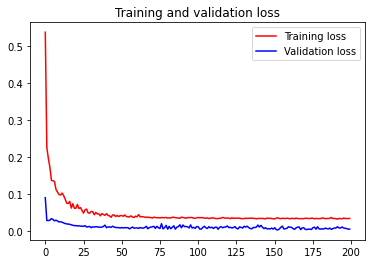

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
pad = np.zeros(time_step)

train_predict1=model1.predict(X1_train).reshape(len(X1_train))
test_predict1=model1.predict(X1_test).reshape(len(X1_test))
print(train_predict1.shape, test_predict1.shape)

train_predict2=model1.predict(X2_train).reshape(len(X2_train))
test_predict2=model1.predict(X2_test).reshape(len(X2_test))
print(train_predict2.shape, test_predict2.shape)

train_predict3=model3.predict(X3_train).reshape(len(X3_train))
test_predict3=model3.predict(X3_test).reshape(len(X3_test))
print(train_predict3.shape, test_predict3.shape)

BTC_pred = np.concatenate((pad, train_predict1, test_predict1), axis=None)
ETH_pred = np.concatenate((pad, train_predict2, test_predict2), axis=None)
DOGE_pred = np.concatenate((pad, train_predict3, test_predict3), axis=None)

print(BTC_pred.shape, ETH_pred.shape, DOGE_pred.shape)
"""
plt.plot(maindf['Date'][:len(y1_train)], maindf['BTC_Open'][:len(y1_train)], label = "Actual price")
plt.plot(maindf['Date'][:len(y1_train)], maindf['BTC_Open'][:len(y1_train)], label = "Actual price")
plt.title('Bitcoin Actual vs. predicted prices')
plt.legend(loc=0)
plt.figure()

plt.show()"""

(568,) (143,)
(568,) (143,)
(568,) (143,)
(731,) (731,) (731,)


'\nplt.plot(maindf[\'Date\'][:len(y1_train)], maindf[\'BTC_Open\'][:len(y1_train)], label = "Actual price")\nplt.plot(maindf[\'Date\'][:len(y1_train)], maindf[\'BTC_Open\'][:len(y1_train)], label = "Actual price")\nplt.title(\'Bitcoin Actual vs. predicted prices\')\nplt.legend(loc=0)\nplt.figure()\n\nplt.show()'

In [ ]:
maindf["BTC_pred"] = pd.DataFrame(BTC_pred)
maindf["ETH_pred"] = pd.DataFrame(ETH_pred)
maindf["DOGE_pred"] = pd.DataFrame(DOGE_pred)

display(maindf)

,index,Date,BTC_Open,BTC_Close,BTC_Volume,BTC_change_factor,ETH_Open,ETH_Close,ETH_Volume,ETH_change_factor,DOGE_Open,DOGE_Close,DOGE_Volume,DOGE_change_factor,btc_newsPosScoreaverage,btc_newsNegScoreaverage,btc_newsComScoreaverage,btc_newsScorecount,eth_newsPosScoreaverage,eth_newsNegScoreaverage,eth_newsComScoreaverage,eth_newsScorecount,doge_newsPosScoreaverage,doge_newsNegScoreaverage,doge_newsComScoreaverage,doge_newsScorecount,cryptocurrency_newsPosScoreaverage,cryptocurrency_newsNegScoreaverage,cryptocurrency_newsComScoreaverage,cryptocurrency_newsScorecount,economy_newsPosScoreaverage,economy_newsNegScoreaverage,economy_newsComScoreaverage,economy_newsScorecount,finance_newsPosScoreaverage,finance_newsNegScoreaverage,finance_newsComScoreaverage,finance_newsScorecount,politics_newsPosScoreaverage,politics_newsNegScoreaverage,...,politics_newsScorecount,pandemic_newsPosScoreaverage,pandemic_newsNegScoreaverage,pandemic_newsComScoreaverage,pandemic_newsScorecount,btc_redditPosScoreaverage,btc_redditNegScoreaverage,btc_redditComScoreaverage,btc_redditScorecount,eth_redditPosScoreaverage,eth_redditNegScoreaverage,eth_redditComScoreaverage,eth_redditScorecount,doge_redditPosScoreaverage,doge_redditNegScoreaverage,doge_redditComScoreaverage,doge_redditScorecount,cryptocurrency_redditPosScoreaverage,cryptocurrency_redditNegScoreaverage,cryptocurrency_redditComScoreaverage,cryptocurrency_redditScorecount,economy_redditPosScoreaverage,economy_redditNegScoreaverage,economy_redditComScoreaverage,economy_redditScorecount,finance_redditPosScoreaverage,finance_redditNegScoreaverage,finance_redditComScoreaverage,finance_redditScorecount,politics_redditPosScoreaverage,politics_redditNegScoreaverage,politics_redditComScoreaverage,politics_redditScorecount,pandemic_redditPosScoreaverage,pandemic_redditNegScoreaverage,pandemic_redditComScoreaverage,pandemic_redditScorecount,BTC_pred,ETH_pred,DOGE_pred
0,0.0,2020-01-31 0:00:00,9508.313477,9350.529297,29432489719,0.983406,184.736908,180.160172,11728616394,0.975226,0.002440,0.002394,76519295,0.981148,0.107909,0.074000,0.126964,11,0.068700,0.021300,0.097690,10,0.000000,0.000000,0.000000,0,0.140000,0.052125,0.189825,8,0.110514,0.073429,0.105009,35,0.031625,0.028375,-0.024538,8,0.069379,0.061897,...,29,0.025357,0.071571,-0.099750,14,0.091350,0.063020,0.222978,100,0.09237,0.03938,0.361353,100,0.116840,0.044750,0.196060,100,0.101440,0.018470,0.365265,100,0.09368,0.097430,-0.038626,100,0.098590,0.057240,0.274926,100,0.10798,0.09278,0.036941,100,0.09918,0.08868,0.015407,100,0.000000,0.000000,0.000000
1,1.0,2020-02-01 0:00:00,9346.357422,9392.875000,25922656496,1.004977,180.113770,183.673950,11569697182,1.019766,0.002391,0.002422,78730830,1.012965,0.036500,0.095000,-0.125188,8,0.080200,0.072400,-0.022620,5,0.000000,0.000000,0.000000,0,0.057857,0.082000,-0.043557,7,0.058800,0.106667,-0.132360,15,0.074067,0.031600,0.086823,30,0.066429,0.063857,...,14,0.000000,0.000000,0.000000,2,0.104100,0.046720,0.305372,100,0.09728,0.02979,0.319943,100,0.123939,0.035697,0.357381,99,0.066210,0.042710,0.144001,100,0.11307,0.102250,0.044050,100,0.110343,0.044788,0.416939,99,0.09337,0.09603,-0.021826,100,0.10269,0.08586,0.097857,100,0.000000,0.000000,0.000000
2,2.0,2020-02-02 0:00:00,9389.820313,9344.365234,30835736946,0.995159,183.532501,188.617538,14054425389,1.027706,0.002421,0.002468,91552515,1.019413,0.107300,0.055000,0.049160,10,0.000000,0.000000,0.000000,3,0.000000,0.000000,0.000000,0,0.026286,0.000000,0.028900,7,0.102857,0.105429,-0.081043,7,0.080417,0.025500,0.106442,12,0.068867,0.087000,...,15,0.046250,0.037250,0.022000,4,0.109400,0.040000,0.342775,100,0.05174,0.02404,0.181080,100,0.141859,0.037778,0.335710,99,0.066630,0.043170,0.157170,100,0.10108,0.086650,0.098146,100,0.109350,0.052070,0.388530,100,0.10146,0.09387,0.043068,100,0.09618,0.11241,0.020461,100,0.000000,0.000000,0.000000
3,3.0,2020-02-03 0:00:00,9344.683594,9293.521484,30934096509,0.994525,188.607407,189.865067,12392875241,1.006668,0.002466,0.0024

In [ ]:
maindf.dropna(subset=['BTC_pred', 'ETH_pred', 'DOGE_pred'])

,index,Date,BTC_Open,BTC_Close,BTC_Volume,BTC_change_factor,ETH_Open,ETH_Close,ETH_Volume,ETH_change_factor,DOGE_Open,DOGE_Close,DOGE_Volume,DOGE_change_factor,btc_newsPosScoreaverage,btc_newsNegScoreaverage,btc_newsComScoreaverage,btc_newsScorecount,eth_newsPosScoreaverage,eth_newsNegScoreaverage,eth_newsComScoreaverage,eth_newsScorecount,doge_newsPosScoreaverage,doge_newsNegScoreaverage,doge_newsComScoreaverage,doge_newsScorecount,cryptocurrency_newsPosScoreaverage,cryptocurrency_newsNegScoreaverage,cryptocurrency_newsComScoreaverage,cryptocurrency_newsScorecount,economy_newsPosScoreaverage,economy_newsNegScoreaverage,economy_newsComScoreaverage,economy_newsScorecount,finance_newsPosScoreaverage,finance_newsNegScoreaverage,finance_newsComScoreaverage,finance_newsScorecount,politics_newsPosScoreaverage,politics_newsNegScoreaverage,...,politics_newsScorecount,pandemic_newsPosScoreaverage,pandemic_newsNegScoreaverage,pandemic_newsComScoreaverage,pandemic_newsScorecount,btc_redditPosScoreaverage,btc_redditNegScoreaverage,btc_redditComScoreaverage,btc_redditScorecount,eth_redditPosScoreaverage,eth_redditNegScoreaverage,eth_redditComScoreaverage,eth_redditScorecount,doge_redditPosScoreaverage,doge_redditNegScoreaverage,doge_redditComScoreaverage,doge_redditScorecount,cryptocurrency_redditPosScoreaverage,cryptocurrency_redditNegScoreaverage,cryptocurrency_redditComScoreaverage,cryptocurrency_redditScorecount,economy_redditPosScoreaverage,economy_redditNegScoreaverage,economy_redditComScoreaverage,economy_redditScorecount,finance_redditPosScoreaverage,finance_redditNegScoreaverage,finance_redditComScoreaverage,finance_redditScorecount,politics_redditPosScoreaverage,politics_redditNegScoreaverage,politics_redditComScoreaverage,politics_redditScorecount,pandemic_redditPosScoreaverage,pandemic_redditNegScoreaverage,pandemic_redditComScoreaverage,pandemic_redditScorecount,BTC_pred,ETH_pred,DOGE_pred
0,0.0,2020-01-31 0:00:00,9508.313477,9350.529297,29432489719,0.983406,184.736908,180.160172,11728616394,0.975226,0.002440,0.002394,76519295,0.981148,0.107909,0.074000,0.126964,11,0.068700,0.021300,0.097690,10,0.000000,0.000000,0.000000,0,0.140000,0.052125,0.189825,8,0.110514,0.073429,0.105009,35,0.031625,0.028375,-0.024538,8,0.069379,0.061897,...,29,0.025357,0.071571,-0.099750,14,0.091350,0.063020,0.222978,100,0.09237,0.03938,0.361353,100,0.116840,0.044750,0.196060,100,0.101440,0.018470,0.365265,100,0.09368,0.097430,-0.038626,100,0.098590,0.057240,0.274926,100,0.10798,0.09278,0.036941,100,0.09918,0.08868,0.015407,100,0.000000,0.000000,0.000000
1,1.0,2020-02-01 0:00:00,9346.357422,9392.875000,25922656496,1.004977,180.113770,183.673950,11569697182,1.019766,0.002391,0.002422,78730830,1.012965,0.036500,0.095000,-0.125188,8,0.080200,0.072400,-0.022620,5,0.000000,0.000000,0.000000,0,0.057857,0.082000,-0.043557,7,0.058800,0.106667,-0.132360,15,0.074067,0.031600,0.086823,30,0.066429,0.063857,...,14,0.000000,0.000000,0.000000,2,0.104100,0.046720,0.305372,100,0.09728,0.02979,0.319943,100,0.123939,0.035697,0.357381,99,0.066210,0.042710,0.144001,100,0.11307,0.102250,0.044050,100,0.110343,0.044788,0.416939,99,0.09337,0.09603,-0.021826,100,0.10269,0.08586,0.097857,100,0.000000,0.000000,0.000000
2,2.0,2020-02-02 0:00:00,9389.820313,9344.365234,30835736946,0.995159,183.532501,188.617538,14054425389,1.027706,0.002421,0.002468,91552515,1.019413,0.107300,0.055000,0.049160,10,0.000000,0.000000,0.000000,3,0.000000,0.000000,0.000000,0,0.026286,0.000000,0.028900,7,0.102857,0.105429,-0.081043,7,0.080417,0.025500,0.106442,12,0.068867,0.087000,...,15,0.046250,0.037250,0.022000,4,0.109400,0.040000,0.342775,100,0.05174,0.02404,0.181080,100,0.141859,0.037778,0.335710,99,0.066630,0.043170,0.157170,100,0.10108,0.086650,0.098146,100,0.109350,0.052070,0.388530,100,0.10146,0.09387,0.043068,100,0.09618,0.11241,0.020461,100,0.000000,0.000000,0.000000
3,3.0,2020-02-03 0:00:00,9344.683594,9293.521484,30934096509,0.994525,188.607407,189.865067,12392875241,1.006668,0.002466,0.0024

In [ ]:
maindf.to_csv("MPD.csv", index=False)

- # Model Evaluation

In [ ]:
# Transform back to original form

"""train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))""" 

- ## Evaluation metrices RMSE, MSE and MAE

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))

NameError: ignored

- ## Variance Regression Score

In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(y1, BTC_pred[20:]))
"""print("Test data explained variance regression score:", 
      explained_variance_score(, t))"""

Train data explained variance regression score: -1.331739393975127


'print("Test data explained variance regression score:", \n      explained_variance_score(, t))'

- ## R square score for regression

In [ ]:
print("Train data R2 score:", r2_score(y1_train, BTC_pred))
print("Test data R2 score:", r2_score(y1_test, test_predict))

- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

- # Comparision of original stock close price and predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['BTC_Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- # Predicting next 30 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

NameError: ignored

- # Plotting last 15 days of dataset and next predicted 30 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Thats it we are Done with Bitcoin Price Prediction using LSTM.